In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import xesmf as xe

In [2]:
ds_lo = xr.open_dataset('./GEOSFP.20160701.A3dyn.4x5.nc')
ds_hi = xr.open_dataset('./GEOSFP.20160701.A3dyn.025x03125.nc')


In [3]:
ds_hi['U']

<xarray.DataArray 'U' (time: 8, lev: 72, lat: 721, lon: 1152)>
[478420992 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2016-07-01T01:30:00 2016-07-01T04:30:00 ...
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -89.9375 -89.75 -89.5 -89.25 -89.0 -88.75 -88.5 ...
  * lon      (lon) float32 -180.0 -179.6875 -179.375 -179.0625 -178.75 ...
Attributes:
    long_name:       Eastward component of wind
    units:           m s-1
    gamap_category:  GMAO-3D$

In [4]:
def make_grid_LL(dlat, dlon):
    '''GEOS-Chem half polar grid'''
    lon_b = np.linspace(-180 - dlon/2, 180 - dlon/2, int(360/dlon) + 1, endpoint=True)
    lat_b = np.linspace(-90 - dlat/2, 90 + dlat/2, int(180/dlat) + 2, endpoint=True).clip(-90,90)
    lat = (lat_b[1:] + lat_b[:-1]) / 2
    lon = (lon_b[1:] + lon_b[:-1]) / 2
    llgrid = {'lat': lat, 
              'lon': lon, 
              'lat_b': lat_b, 
              'lon_b': lon_b}
    return llgrid

In [5]:
grid_lo = make_grid_LL(4, 5)

In [6]:
grid_hi = make_grid_LL(0.25, 0.3125)

In [7]:
regridder = xe.Regridder(grid_hi, grid_lo, method='conservative', reuse_weights=True)

Reuse existing file: conservative_721x1152_46x72.nc


In [10]:
%%time
dr_v_reg = regridder(ds_hi['V'])

CPU times: user 1.86 s, sys: 519 ms, total: 2.38 s
Wall time: 2.44 s


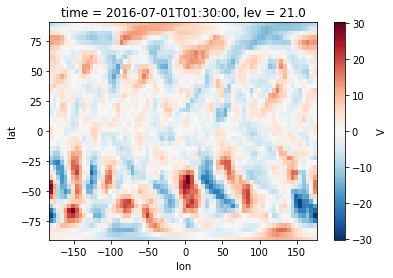

In [11]:
dr_v_reg[0, 20] .plot()

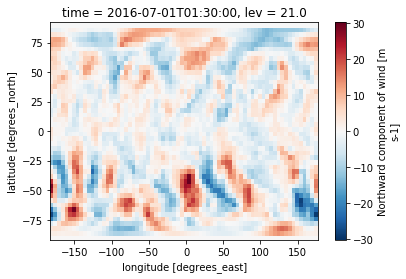

In [12]:
ds_lo['V'][0, 20].plot()

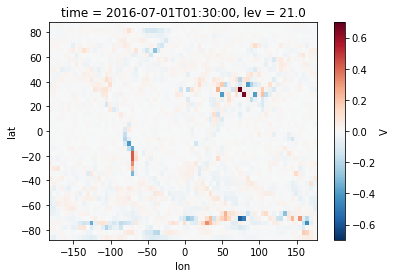

In [13]:
# Almost the same. Minor difference because pressure-weighting is skiped here
(dr_v_reg[0, 20] - ds_lo['V'][0, 20]).plot()